In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline
plt.style.use("ggplot")
from skimage import io
from PIL import Image

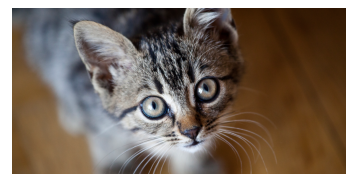

In [2]:
image = io.imread('img/Thinking-of-getting-a-cat.png')
labels = plt.axes(xticks=[], yticks=[])
labels.imshow(image);

# Reshape image into pixel data

In [3]:
image_data = (image).reshape(1200*600, 3)
image_data

array([[ 44,  49,  56],
       [ 34,  38,  44],
       [ 31,  33,  42],
       ...,
       [ 97,  64,  26],
       [ 93,  62,  22],
       [101,  68,  29]], dtype=uint8)

In [4]:
image_data # R G B for each 720000 pixels

array([[ 44,  49,  56],
       [ 34,  38,  44],
       [ 31,  33,  42],
       ...,
       [ 97,  64,  26],
       [ 93,  62,  22],
       [101,  68,  29]], dtype=uint8)

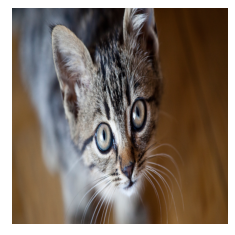

In [5]:
im = Image.open('img/Thinking-of-getting-a-cat.png')
size = (500, 500)
out = im.resize(size)
out.save('img/cat-image-resize.png')
resize_im = io.imread('img/cat-image-resize.png')
labels = plt.axes(xticks=[], yticks=[])
labels.imshow(resize_im)